In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [11]:
df = pd.read_csv('./data/stud.csv')

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# Independent and dependent features
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [14]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [16]:
# Column Transformer
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
std_scaler = StandardScaler()

col_transformer = ColumnTransformer([
    ("OneHotEncoder", oh_encoder, cat_features),
    ("StandardScaler", std_scaler, num_features)
])

In [17]:
X = col_transformer.fit_transform(X)

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [20]:
# Model evaluation
def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mse)
    score = r2_score(true, pred)
    return mae, rmse, score

In [22]:
models = {
    "Linear Regressor": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor": Lasso(),
    "SVM Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "RandomForest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "GradientBoost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

In [23]:
model_score = dict()

In [29]:
for i in range(0, len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]

    # Model Training
    model.fit(X_train, y_train)

    # Model Prediction
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Model Evaluation
    mae_train, rmse_train, score_train = evaluate_model(y_train, y_pred_train)
    mae_test, rmse_test, score_test = evaluate_model(y_test, y_pred_test)

    # Printing the results
    print(model_name)
    print('-'*15)
    print('Training Results')
    print('Mean Absolute Error:', mae_train)
    print('Root Mean Square Error:', rmse_train)
    print('R2 score: {:.4f}'.format(score_train))
    print('-'*15)
    print('Test Results')
    print('Mean Absolute Error:', mae_train)
    print('Root Mean Square Error:', rmse_train)
    print('R2 score: {:.4f}'.format(score_test))
    print('='*15)

    # Storing the results
    model_score[model_name] = score_test

Linear Regressor
---------------
Training Results
Mean Absolute Error: 4.271484375
Root Mean Square Error: 5.329287354885032
R2 score: 0.8740
---------------
Test Results
Mean Absolute Error: 4.271484375
Root Mean Square Error: 5.329287354885032
R2 score: 0.8790
Ridge Regressor
---------------
Training Results
Mean Absolute Error: 4.264987823725981
Root Mean Square Error: 5.323324922741654
R2 score: 0.8743
---------------
Test Results
Mean Absolute Error: 4.264987823725981
Root Mean Square Error: 5.323324922741654
R2 score: 0.8806
Lasso Regressor
---------------
Training Results
Mean Absolute Error: 5.206302661246526
Root Mean Square Error: 6.593815587795565
R2 score: 0.8071
---------------
Test Results
Mean Absolute Error: 5.206302661246526
Root Mean Square Error: 6.593815587795565
R2 score: 0.8253
SVM Regressor
---------------
Training Results
Mean Absolute Error: 4.869189452384867
Root Mean Square Error: 6.57700724251018
R2 score: 0.8081
---------------
Test Results
Mean Absolute Er

In [30]:
model_score

{'Linear Regressor': 0.8790464771743793,
 'Ridge Regressor': 0.8805931485028738,
 'Lasso Regressor': 0.8253197323627853,
 'SVM Regressor': 0.7286001513223704,
 'Decision Tree Regressor': 0.7349164784514075,
 'KNN Regressor': 0.7838129945787431,
 'RandomForest Regressor': 0.8509242413157576,
 'Adaboost Regressor': 0.8455677015011235,
 'GradientBoost Regressor': 0.8721874230820342,
 'XGBoost Regressor': 0.8277965653186071}

Model: Linear Regression

In [34]:
# Applying Linear Regression

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 87.90%


<Axes: xlabel='math_score'>

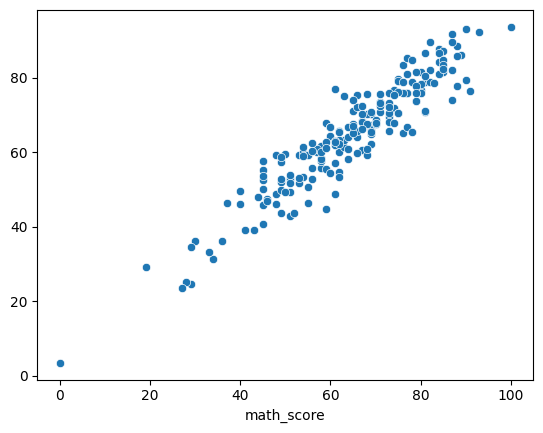

In [36]:
sns.scatterplot(x=y_test, y=y_pred)

<Axes: xlabel='math_score'>

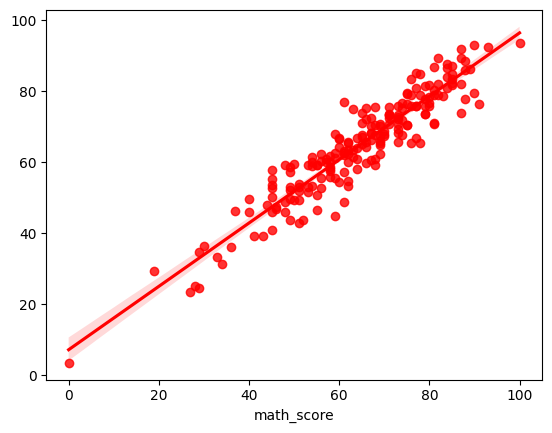

In [37]:
sns.regplot(x=y_test, y=y_pred, color='r')